<a href="https://colab.research.google.com/github/hadush16/machine-learning/blob/main/polynomial_Hadush_Brhane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coure Name :Machine Learning
# Course Code : CSE 405
# Labratory  Assignment

## Lab_1 : polynomial  Regression with multiple variable
Name Hadush Brhane id 062/12

## Overview
In this practical, we implement and train polynomial regression

## Learning Objectives
* Understand how a datasets are prepared and loaded to our model
* Understand how a model is trained and evaluated
* Understand the concept of **train/validation/test split** and why it's useful
* Research at least 1 technique that can be used to improve model **generalisation**


### Import all the required libraries

To achieve a more detailed and accurate trained model for predicting maximum temperature using the given features (MinTemp and MeanTemp), we can split the code into a separate file and make some improvements to enhance the model's performance and visualization. Below is the detailed process divided into steps and a separate Python script file.

Steps:


1.   Load and Explore the Data:
    Load the dataset and conduct an initial exploration.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics

In [46]:

# Load dataset
data_set = '/content/Weather.csv'
dataset = pd.read_csv(data_set)

# Data exploration
print("Dataset Head:\n", dataset.head())
print("Dataset Description:\n", dataset.describe())
print("Missing Values:\n", dataset.isnull().sum())

Dataset Head:
      STA      Date Precip  WindGustSpd    MaxTemp    MinTemp   MeanTemp  \
0  10001  1942-7-1  1.016          NaN  25.555556  22.222222  23.888889   
1  10001  1942-7-2      0          NaN  28.888889  21.666667  25.555556   
2  10001  1942-7-3   2.54          NaN  26.111111  22.222222  24.444444   
3  10001  1942-7-4   2.54          NaN  26.666667  22.222222  24.444444   
4  10001  1942-7-5      0          NaN  26.666667  21.666667  24.444444   

  Snowfall PoorWeather  YR  ...  FB  FTI ITH  PGT  TSHDSBRSGF  SD3  RHX  RHN  \
0      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
1      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
2      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
3      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
4      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   

  RVG  WTE  
0 NaN  NaN  
1 NaN  NaN  
2 NaN  NaN  
3

<ipython-input-46-f1f01dbfca74>:3: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(data_set)


In [54]:
dataset.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


2. Preprocess the Data:
Handle missing values and encode categorical variables if needed.


In [47]:
dataset

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3.   Visualize the Data:
Create scatter plots and distribution plots to understand the relationships between variables.

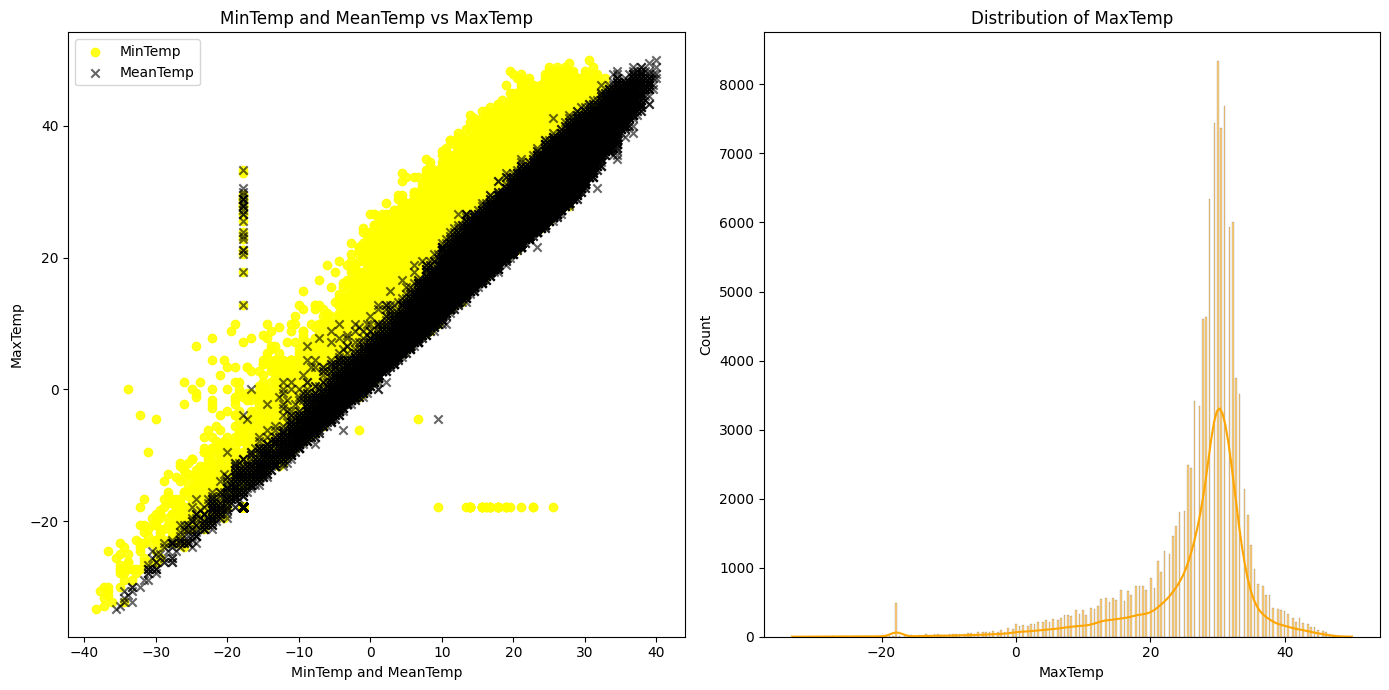

In [51]:
# Visualize the Data
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(dataset['MinTemp'], dataset['MaxTemp'], color='yellow', label='MinTemp', alpha=0.9, marker='o')
plt.scatter(dataset['MeanTemp'], dataset['MaxTemp'], color='black', label='MeanTemp', alpha=0.6, marker='x')
plt.title('MinTemp and MeanTemp vs MaxTemp')
plt.xlabel('MinTemp and MeanTemp')
plt.ylabel('MaxTemp')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(dataset['MaxTemp'], kde=True, color='orange')
plt.title('Distribution of MaxTemp')

plt.tight_layout()
plt.show()

4.Train the Model:
Split the data into training and testing sets, train a polynomial regression model, and evaluate its performance.


In [52]:

# Polynomial Regression
poly = PolynomialFeatures(degree=3)
X = dataset[['MinTemp', 'MeanTemp']]
y = dataset['MaxTemp']
X_poly = poly.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.5, random_state=0)

# Training the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

5.Visualize the Model's Predictions:
Create visualizations to compare actual and predicted values.


Actual vs Predicted Values:
       Actual  Predicted
0  28.888889  29.577227
1  31.111111  31.007577
2  27.222222  27.125388
3  28.888889  28.908448
4  23.333333  23.160379


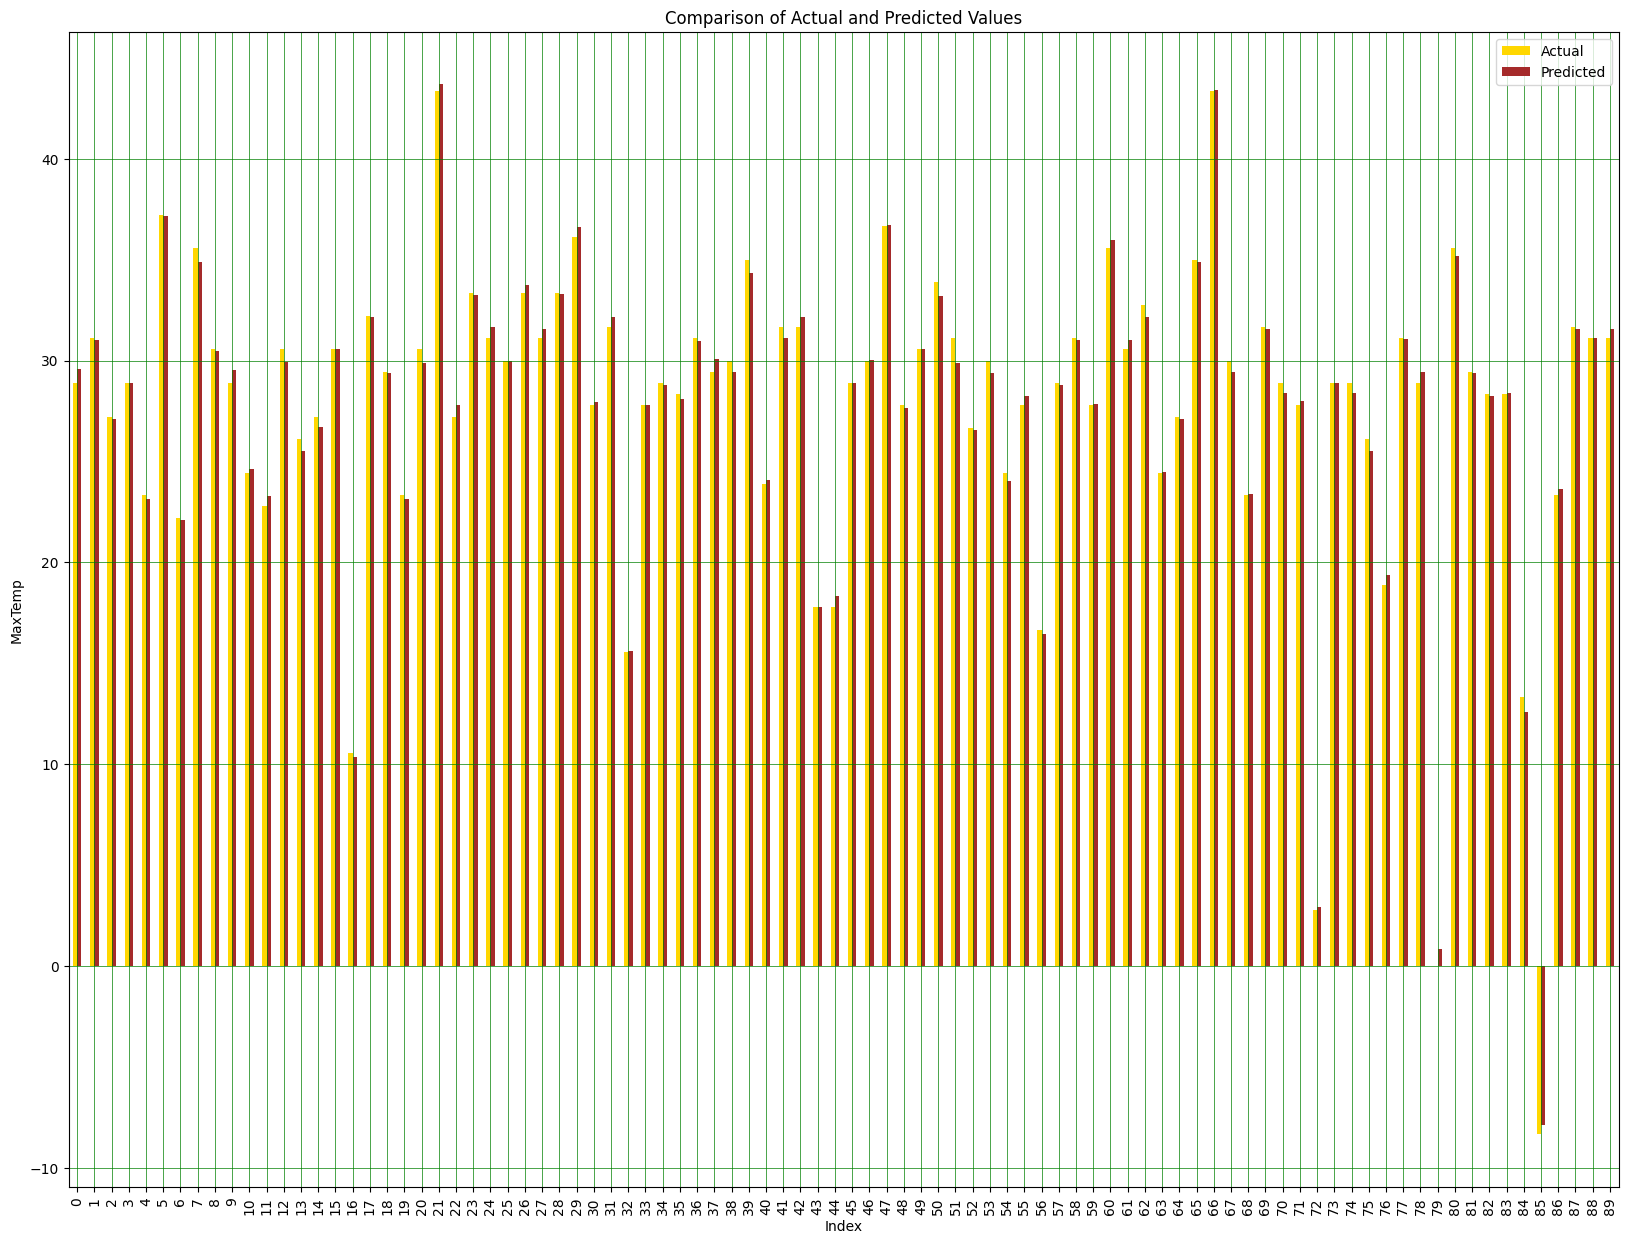

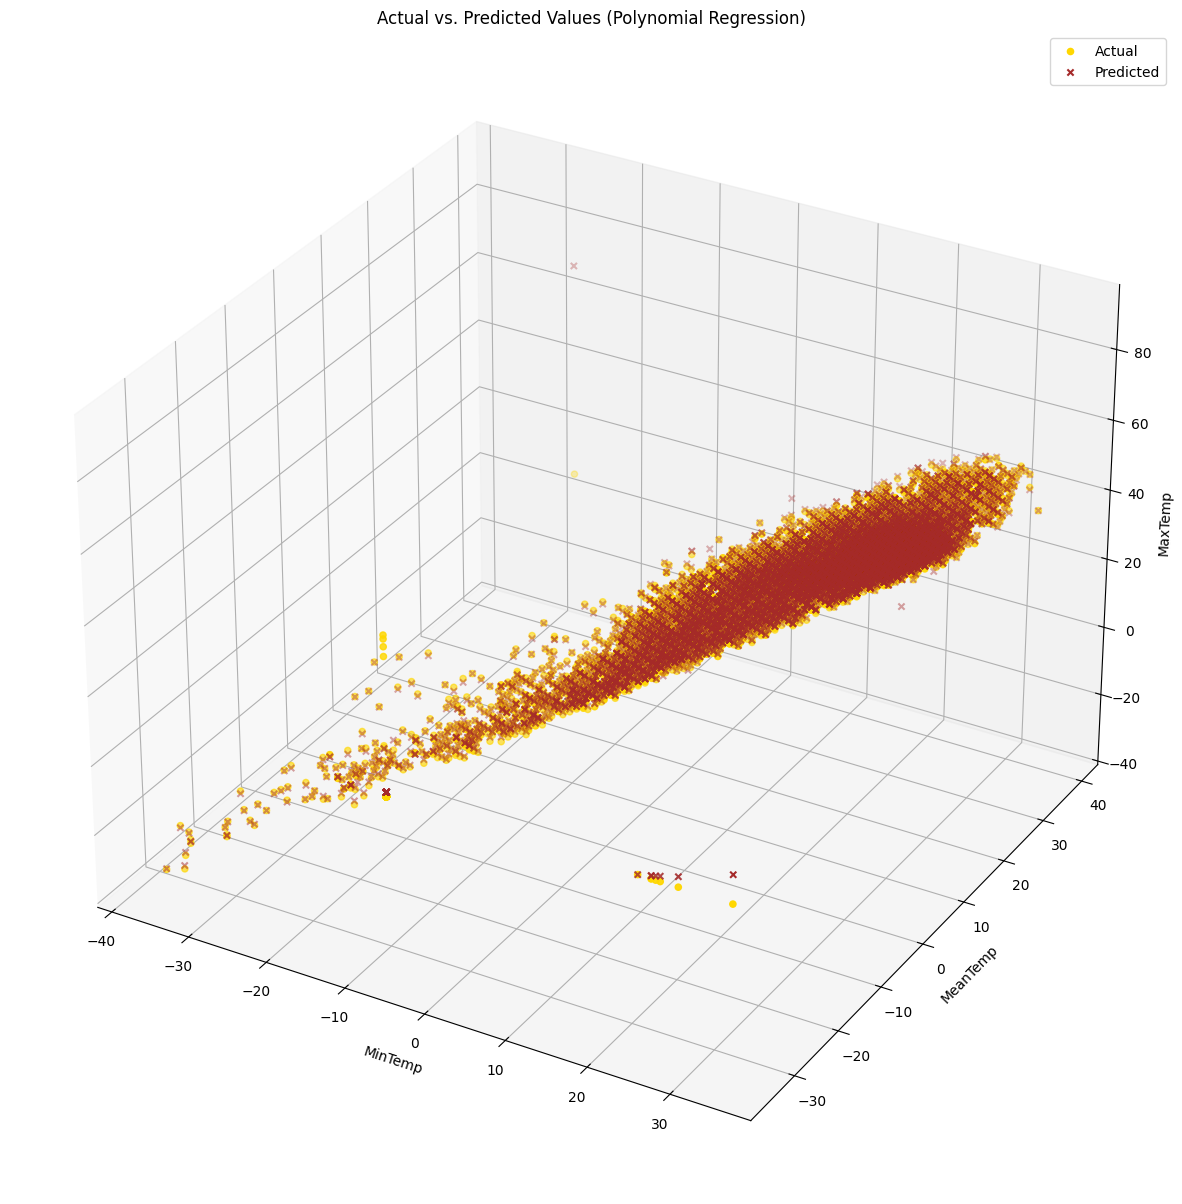

In [ ]:
# Making predictions
y_pred = regressor.predict(X_test)

# Comparing actual vs predicted values
df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print("\nActual vs Predicted Values:\n", df.head())

# Bar Plot for Actual vs Predicted Values
df1 = df.head(90)
df1.plot(kind='bar', figsize=(20, 15), color=['gold', 'brown'])
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('MaxTemp')
plt.show()

# 3D plot for actual vs predicted values
fig = plt.figure(figsize=(15, 25))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:, 1], X_test[:, 2], y_test, color='gold', label='Actual', marker='o')
ax.scatter(X_test[:, 1], X_test[:, 2], y_pred, color='brown', label='Predicted', marker='x')
ax.set_xlabel("MinTemp")
ax.set_ylabel("MeanTemp")
ax.set_zlabel("MaxTemp")
ax.set_title("Actual vs. Predicted Values (Polynomial Regression)")
ax.legend()
plt.show()

In [ ]:

# Evaluating the model
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

# Save the model for future predictions (optional)
import joblib
joblib.dump(regressor, 'weather_prediction_model.pkl')
joblib.dump(poly, 'poly_transformer.pkl')

Mean Absolute Error: 0.3556317385123411
Mean Squared Error: 0.7133746470914262
Root Mean Squared Error: 0.8446150881267905


['poly_transformer.pkl']